In [159]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from PIL import Image
from tqdm import tqdm
import io
from IPython.display import clear_output, display

In [104]:
with open("./data_inputs/day14_input.txt") as f:
    input_raw = f.read()

input = [line.split(" -> ") for line in input_raw.split("\n")]
input = [[tuple(map(int, coords.split(","))) for coords in line] for line in input]

In [105]:
min_max_x = [float("inf"), -float("inf")]
min_max_y = [float("inf"), -float("inf")]
for line in input:
    for coord in line:
        if coord[0] < min_max_x[0]:
            min_max_x[0] = coord[0]
        elif coord[0] > min_max_x[1]:
            min_max_x[1] = coord[0]
        if coord[1] < min_max_y[0]:
            min_max_y[0] = coord[1]
        elif coord[1] > min_max_y[1]:
            min_max_y[1] = coord[1]

print("x range:", min_max_x, "\ty range:", min_max_y)

x range: [480, 537] 	y range: [15, 161]


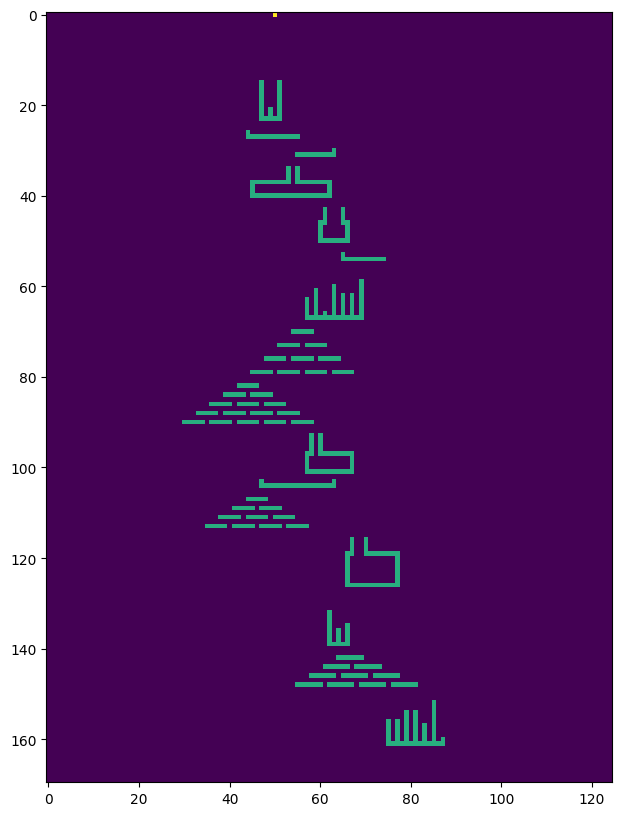

In [148]:
SOURCE = 8
SAND = 9
TRAIL = 2
ROCK = 5
AIR = 0

def generate_cave_map(part=1, h=170, w=125, x_off=450, input=input):
    cave_map = np.zeros((h, w), dtype=np.uint8)  # i, j => y, x
    cave_map[0, 500-x_off] = SOURCE

    for line in input:
        for i in range(len(line) - 1):
            x1, y1 = line[i]
            x2, y2 = line[i+1]
            x1, x2 = x1 - x_off, x2 - x_off
            if x1 > x2:
                x1, x2 = x2, x1
            if y1 > y2:
                y1, y2 = y2, y1

            if x1 == x2:       
                cave_map[y1:(y2+1), x1] = ROCK
            else:
                cave_map[y1, x1:(x2+1)] = ROCK

    if part == 2:
        cave_map[min_max_y[1]+2] = ROCK

    return cave_map


cave_map = generate_cave_map()

plt.imshow(cave_map)
plt.rcParams["figure.figsize"] = (8, 16)
plt.show()

In [186]:
def sand_simulation(cave_map, x_off=450, plot=False):
    count_sand_stable = 0
    is_all_sand_falling = False

    frames = []

    while not is_all_sand_falling:
        is_sand_stable = False
        sand_i = [0, 500-x_off]
        
        while not is_sand_stable and not is_all_sand_falling:
            if sand_i[0] >= 169:
                is_all_sand_falling = True
                break
            
            if cave_map[tuple(sand_i)] != TRAIL:
                cave_map[tuple(sand_i)] = TRAIL

            down = (sand_i[0]+1, sand_i[1])
            down_l = (sand_i[0]+1, sand_i[1]-1)
            down_r = (sand_i[0]+1, sand_i[1]+1)

            if cave_map[down] in [AIR, TRAIL]:
                sand_i = down
            elif cave_map[down_l] in [AIR, TRAIL]:
                sand_i = down_l
            elif cave_map[down_r] in [AIR, TRAIL]:
                sand_i = down_r
            else:
                cave_map[tuple(sand_i)] = SAND
                is_sand_stable = True
                count_sand_stable += 1
                if sand_i == [0, 500-x_off]:
                    is_all_sand_falling = True

        if plot:
            plt.figure(figsize=(5,7))
            plt.imshow(cave_map)
            plt.title(f"Sand units: {count_sand_stable}")
            plt.tight_layout()
            plt.axis("off")
            buf = io.BytesIO()
            plt.savefig(buf, format="png")
            buf.seek(0)
            frames.append(Image.open(buf))
            plt.close()
            clear_output(wait=True)
            display(f"{len(frames)} - {count_sand_stable} / 674")
    
    if plot:
        for _ in range(50):
                    plt.figure(figsize=(5,7))
                    plt.imshow(cave_map)
                    plt.title(f"Sand units: {count_sand_stable}")
                    plt.tight_layout()
                    plt.axis("off")
                    buf = io.BytesIO()
                    plt.savefig(buf, format="png")
                    buf.seek(0)
                    frames.append(Image.open(buf))
                    plt.close()
        frame_one = frames[0]
        frame_one.save("day14_part_1.gif", format="GIF", append_images=frames, save_all=True, duration=25, loop=0)

    return count_sand_stable

'675 - 674 / 674'

Result 1: 674


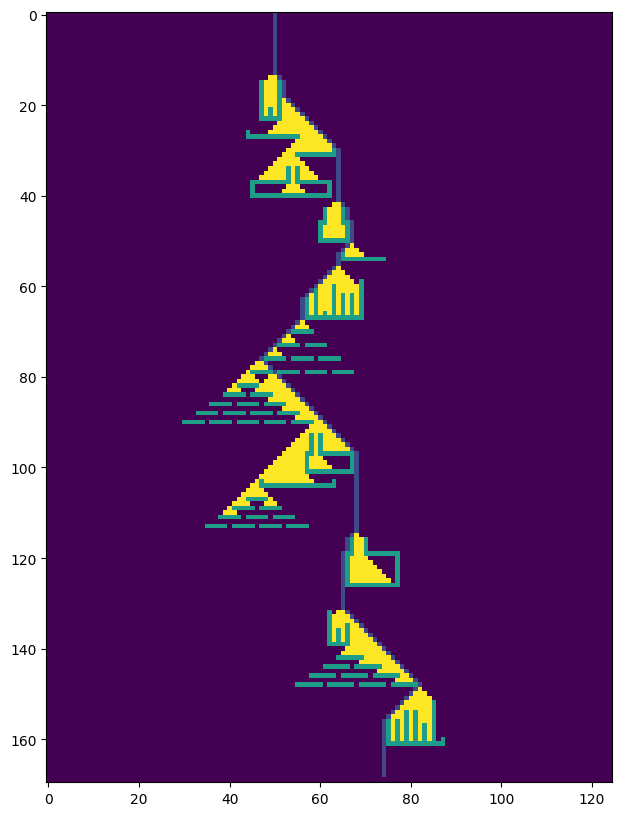

In [187]:
# ---- Part 1 ----

cave_map = generate_cave_map(part=1)

count_sand_stable = sand_simulation(cave_map, plot=True)

print("Result 1:", count_sand_stable)

plt.imshow(cave_map)
plt.rcParams["figure.figsize"] = (14, 10)
plt.show()

![SegmentLocal](day14_part_1.gif "segment")

Result 2: 24958


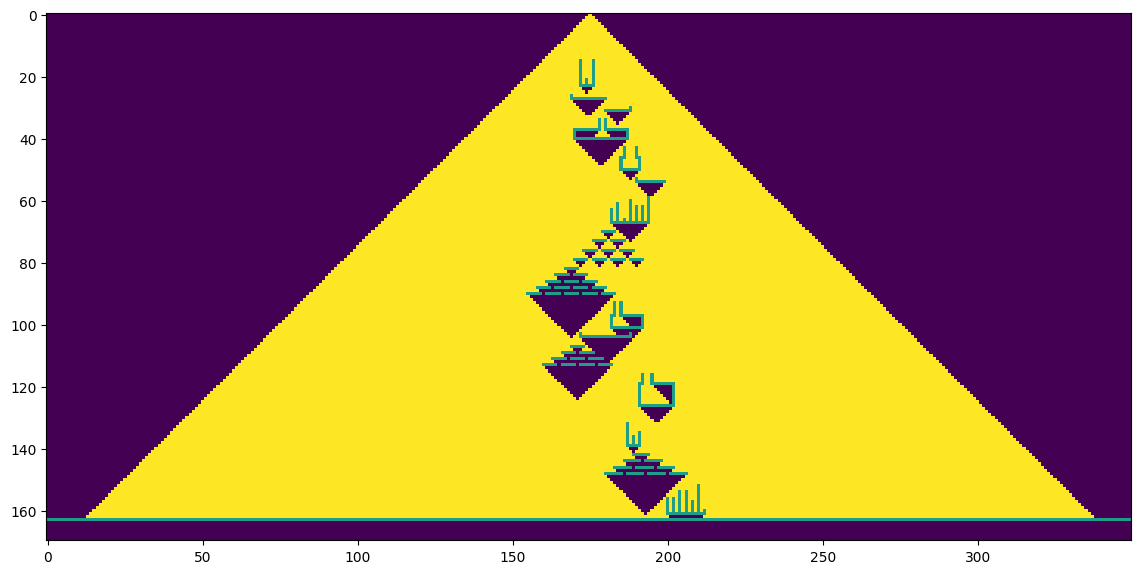

In [146]:
# ---- Part 2 ----

cave_map2 = generate_cave_map(part=2, h=170, w=350, x_off=325)

count_sand_stable2 = sand_simulation(cave_map2, x_off=325)

print("Result 2:", count_sand_stable2)

plt.imshow(cave_map2)
plt.rcParams["figure.figsize"] = (14, 10)
plt.show()